In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from tqdm import tqdm
import math
from scipy.linalg import pascal

In [3]:
def convert_number_system(number, base):
    ans = []
    temp = number
    while number >= base:
        ans.append(number % base)
        number = number // base
    ans.append(number)
    return temp, ans, sum([ans[i] / base ** (i + 1) for i in range(len(ans))])

In [4]:
k = 100
base = 3
a = convert_number_system(k, base)[1]
r = len(a)
k_test = sum([a[i] * base ** i for i in range(r)])
print('k:', k)
print('k_test:', k_test)

k: 100
k_test: 100


In [106]:
def get_faure_c_matrix(i, k, base):
    r = len(convert_number_system(k, base)[1])
    C = np.zeros((r, r))
    pascal_matrix = pascal(r, kind='upper')
    for j in range(r):
        C_vector = []
        for l in range(r):
            if l >= j:
                C_vector.append(pascal_matrix[j][l] * (i ** (l - j)))
            else:
                C_vector.append(0)
        C[j] = C_vector
    return C

In [81]:
for r in range(2, 4):
    for i in range(1, 4):
        print(get_faure_c_matrix(i, r ** 2 , base))
        print()
    print('====')

[[1. 1.]
 [0. 1.]]

[[1. 2.]
 [0. 1.]]

[[1. 3.]
 [0. 1.]]

====
[[1. 1. 1.]
 [0. 1. 2.]
 [0. 0. 1.]]

[[1. 2. 4.]
 [0. 1. 4.]
 [0. 0. 1.]]

[[1. 3. 9.]
 [0. 1. 6.]
 [0. 0. 1.]]

====


In [65]:
# надо правильно считать y
def get_faure_y(i, k, base):
    a = convert_number_system(k, base)[1]
    r = len(a)
    return  np.apply_along_axis(lambda x: x % base, 0, get_faure_c_matrix(i - 1, k, base).dot(a))

In [102]:
def get_faure_x(d, max_number, base):
    faure_sequence = np.zeros((max_number, d))
    for k in tqdm(range(1, max_number + 1)):
        a = convert_number_system(k, base)[1]
        r = len(a)
        x = np.zeros(d)
        for i in range(1, d + 1):
            y = get_faure_y(i, k, base)
            x[i - 1] = sum([y[j] * pow(base, -j - 1) for j in range(r)])
            faure_sequence[k - 1][i - 1] = x[i - 1]
    return faure_sequence.T

In [118]:
a = get_faure_x(31, 961, 31)

100%|██████████| 961/961 [00:02<00:00, 385.31it/s]


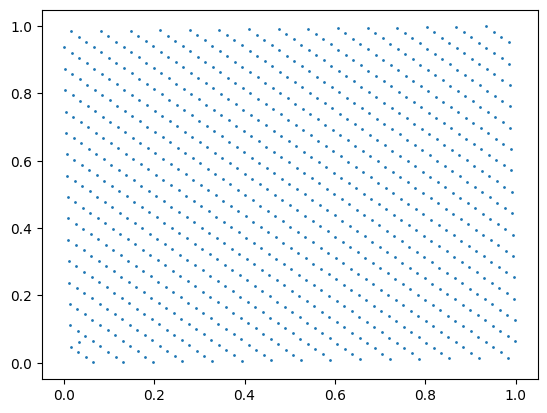

In [133]:
plt.scatter(a[1], a[30], 1)